In [8]:
install.packages("dplyr")

Installation du package dans 'C:/Users/USER/AppData/Local/R/win-library/4.5'
(car 'lib' n'est pas spécifié)

installation de la dépendance 'generics'




le package 'generics' a été décompressé et les sommes MD5 ont été vérifiées avec succés
le package 'dplyr' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\USER\AppData\Local\Temp\Rtmpaa1l68\downloaded_packages


# Importation des packages

On importe ici tous les packages nécessaires pour le pipeline et pour le traitement des données.

In [33]:
library(pipeflow)
library(pip)
library(haven)
library(dplyr)

ERROR: Error in library(pip): aucun package nommé 'pip' n'est trouvé


# Description des enquêtés

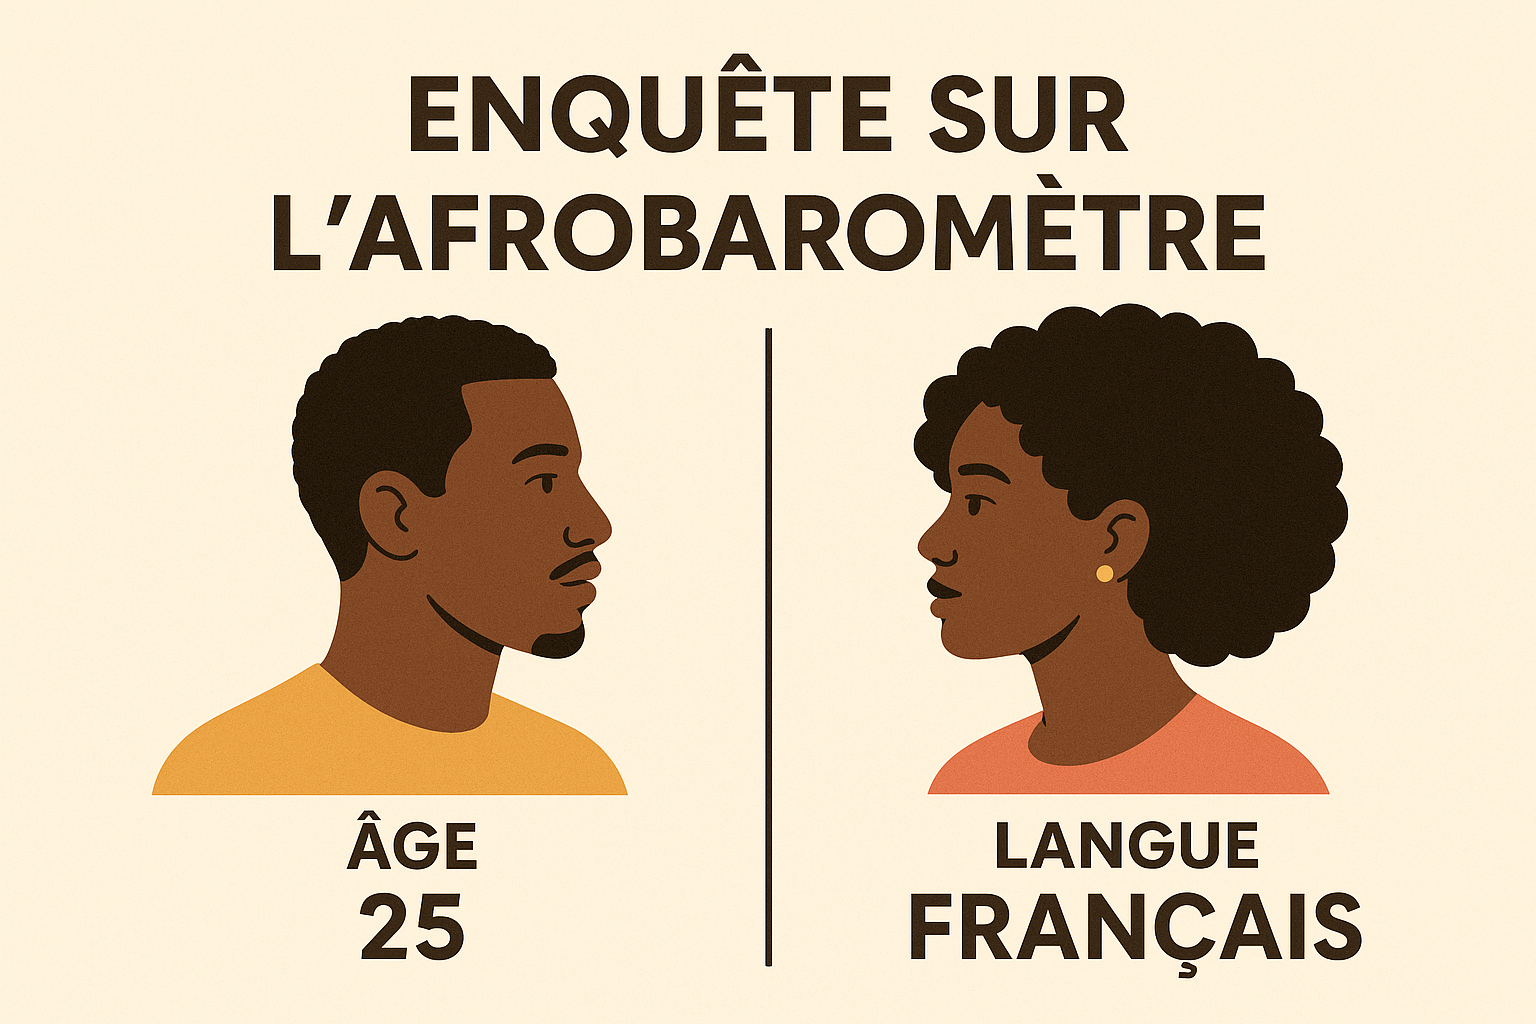

In [ ]:
Cette partie concerne le traitement des données
relatives à la description des enquêtés.

Il s'agira: 
- d'imputer les valeurs manquantes
- de corriger les valeurs abbérantes
- de faire des recodages

## Importation des données

In [4]:
data = read_sav("Senegal Questionnaire Principal 24May22_2022_22_06_11_33.sav")

In [10]:
data = data%>%select(Q1,Q2,Q84A,Q84AOTHER,Q84B,Q84C,Q84D,Q84E,Q85A
                , Q85B,Q86A,Q86B,Q86C,Q86D,Q86E,Q86F,Q87A,Q87B
                ,Q87C,Q87D,Q87E,Q88A_1,Q88A_2,Q88A_3,Q88A,Q88B_1
                ,Q88B_2,Q88B_3,Q88B,Q89A,Q89B,Q89BOTHER,Q_327,Q90A_1
                 ,Q90B_1,Q90C_1,Q90D_1,Q90E_1,Q90F_1,Q90A_2,Q90B_2
                ,Q90C_2,Q90D_2,Q90E_2,Q90F_2,Q90A,Q90B,Q90C,Q90D
                ,Q90E,Q90F,Q90G,Q90H,Q90I,Q91A,Q91B,Q91C,Q92A,
                Q92B,Q93A_1,Q93A_Yes,Q93A_No,Q93A,Q93B_yes,Q93Byes_OTHER
                ,Q93B_2,Q93B2__OTHER,Q93B,Q93BOTHER,Q93C,Q94,Q95,
                Q95AOTHER,Q96,Q96OTHER,Q97,Q98A,Q98A_1,Q98A_2,Q98A_3,
                Q98A_4,Q98A_5,Q99)

## Exploration des données

In [18]:
View(data[1:10,])

Q1,Q2,Q84A,Q84AOTHER,Q84B,Q84C,Q84D,Q84E,Q85A,Q85B,⋯,Q96,Q96OTHER,Q97,Q98A,Q98A_1,Q98A_2,Q98A_3,Q98A_4,Q98A_5,Q99
<dbl>,<dbl+lbl>,<dbl+lbl>,<chr>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl+lbl>,<chr>,<dbl+lbl>,<dbl+lbl>,<chr>,<dbl+lbl>,<chr>,<dbl+lbl>,<chr>,<chr>
35,660,662,,0,5,1,1,4,3,⋯,9999,,1,1,782079454,0,-1,NA,-1,0
25,663,663,,3,5,1,1,4,2,⋯,9997,,8,1,703297483,0,-1,NA,-1,L'état laisser la politique et se concentrer sur le développement du pays et l'éducation
40,661,661,,0,5,1,1,5,1,⋯,9999,,99,1,776695358,0,-1,NA,-1,"lutter contre la cherete des prix, revoir les modalités de soin de santé cher et non accessibles diminuer les tarif de logements, diminuer les prix des facture d'électricité et d’eau veuillez a la sécurité"
30,660,661,,0,5,1,1,5,3,⋯,663,,8,0,-1,NA,-1,NA,-1,MON PROBLÈME PRINCIPALE EST LA CHERETE DE LA VIE.SI LE GOUVERNEMENT POUVAIT NOUS AIDER EN BAISSANT LES PRIX
34,660,660,,0,5,1,1,5,3,⋯,678,,1,1,772437137,0,-1,NA,-1,LE GOUVERNEMENT DOIT REDOUBLER D’EFFORT SUR LA PAUVRETÉ. ON EST FATIGUÉ
24,660,660,,0,3,1,1,5,3,⋯,678,,8,1,762819770,0,-1,NA,-1,RENFORCER LA SECURITE DE LA POPULATION
25,662,662,,0,3,1,1,4,3,⋯,9995,PAPE DJIBRIL FALL,0,1,783596494,1,779464721,0,-1,"RENFORCER L’AGRICULTURE, LE COMMERCE ET L’ELEVAGE"
40,660,661,,0,5,1,1,5,3,⋯,9998,,1,1,772705362,1,783207799,0,-1,lutter contre l injustice ameliorer le plateau technique et revoir l accueil cherete des denrées alimentaires alors que les salaires n ont pas connu de hausse
38,661,661,,0,5,1,1,4,2,⋯,663,,99,1,776180739,0,-1,NA,-1,CHERETE DES DENREES CHERETE LOCATION


In [17]:
summary(data)

       Q1              Q2              Q84A       Q84AOTHER        
 Min.   :18.00   Min.   :   2.0   Min.   : 660   Length:1200       
 1st Qu.:26.00   1st Qu.: 660.0   1st Qu.: 660   Class :character  
 Median :38.00   Median : 660.0   Median : 661   Mode  :character  
 Mean   :39.95   Mean   : 808.3   Mean   :1004                     
 3rd Qu.:52.00   3rd Qu.: 661.0   3rd Qu.: 662                     
 Max.   :89.00   Max.   :9998.0   Max.   :9995                     
                                                                   
      Q84B            Q84C            Q84D             Q84E       
 Min.   :0.000   Min.   :1.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:3.000   1st Qu.:1.0000   1st Qu.:1.0000  
 Median :0.000   Median :4.000   Median :1.0000   Median :1.0000  
 Mean   :0.335   Mean   :3.837   Mean   :0.8483   Mean   :0.9725  
 3rd Qu.:0.000   3rd Qu.:5.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :9.000   Max.   :9.000   Max.   :2.0000   Max.

In [59]:
View(data[data$Q2 == 660,])

Q1,Q2,Q84A,Q84AOTHER,Q84B,Q84C,Q84D,Q84E,Q85A,Q85B,⋯,Q96,Q96OTHER,Q97,Q98A,Q98A_1,Q98A_2,Q98A_3,Q98A_4,Q98A_5,Q99
<dbl>,<dbl+lbl>,<dbl+lbl>,<chr>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl+lbl>,<chr>,<dbl+lbl>,<dbl+lbl>,<chr>,<dbl+lbl>,<chr>,<dbl+lbl>,<chr>,<chr>
35,660,662,,0,5,1,1,4,3,⋯,9999,,1,1,782079454,0,-1,NA,-1,0
30,660,661,,0,5,1,1,5,3,⋯,663,,8,0,-1,NA,-1,NA,-1,MON PROBLÈME PRINCIPALE EST LA CHERETE DE LA VIE.SI LE GOUVERNEMENT POUVAIT NOUS AIDER EN BAISSANT LES PRIX
34,660,660,,0,5,1,1,5,3,⋯,678,,1,1,772437137,0,-1,NA,-1,LE GOUVERNEMENT DOIT REDOUBLER D’EFFORT SUR LA PAUVRETÉ. ON EST FATIGUÉ
24,660,660,,0,3,1,1,5,3,⋯,678,,8,1,762819770,0,-1,NA,-1,RENFORCER LA SECURITE DE LA POPULATION
40,660,661,,0,5,1,1,5,3,⋯,9998,,1,1,772705362,1,783207799,0,-1,lutter contre l injustice ameliorer le plateau technique et revoir l accueil cherete des denrées alimentaires alors que les salaires n ont pas connu de hausse
55,660,662,,1,3,1,1,5,3,⋯,678,,3,1,774103632,0,-1,NA,-1,CHERS DIRIGEANTS NOUS IMPLORONS DE VENIR EN AIDE A LA POLUTION.DE TROUVER DES SOLUTIONS AUX PROBLÈMES DE CHOMAGE.DIMINUER LES CAMPAGNES EN ATTENDANT LES ÉCHÉANCEES.
31,660,660,,1,5,1,1,4,3,⋯,678,,1,1,762720592,0,-1,NA,-1,AIDER NOUS LA VIE EST CHEZ NOUS DEMANDONS AU GOUVERNEMENT DE CESSER DE VENDRE LA MER CAR NOUS N AVONS PLUS DE POISSONS ET NOS MARIS SONT AU CHAUMAGE
65,660,660,,0,5,1,1,5,3,⋯,663,,8,1,761896852,0,-1,NA,-1,AIDER LE DÉVELOPPEMENT DE LA PECHE ET L’ASSAINISSEMENT DE NOTRE QUARTIER
34,660,660,,0,5,0,1,1,3,⋯,686,,1,1,784236536,1,771382300,0,-1,La vie est devenu beacoup difficile ous avons des souci d’insécurité et de démocratie. J’ai besoin de financement et une aide sociale pourprendre a bien mes enfants


L'âge (Q1) n'a pas de valeurs abérrantes. La plage de l'âge
est de 18 à 89 ans. Par la suite, les variables qui n'ont pas de soucis ne
seront pas commentées. Nous allons nous attarder uniquement sur les variables qui
nécessitent une correction.

In [26]:
# Convertir Q2 en facteur avec les labels
Q2_fac <- as_factor(data$Q2)

# Table des fréquences
table(Q2_fac)

Q2_fac
          Français      Wolof / Lebou  Pulaar/Toucouleur              Serer 
                29                677                230                120 
  Mandinka/Bambara            Soninke              Diola            Manjack 
                48                 22                 38                  7 
           Bainouk            Bassari              Autre Refuse de répondre 
                 5                  3                 20                  1 
    Je ne sais pas 
                 0 

- La variable Q2(Quelle est la langue que vous parlez le plus) contient un refus de réponse, nous allons la remplacer par sa valeur pour la variable Q84A (à quelle éthnie appartenait vous)

 - La variable qui capte la fréquance à la quelle le groupe éthnique du répondant est male traités(Q84B)contient des refus de réponse, nous allons les remplacer par les réponses les plus fréquentes dans le groupe éthnique dans lequel il est


## Preprocessing

On va mettre les données dans un pipeline. Le nom du pipeline est my-pipeline.
le pipeline permettra l'automatisation du traitement. C'est un ensemble de fonctions 
interconnecté réutilisable

### Définition du pipeline

In [30]:
pip <- Pipeline$new("my-pipeline", data = data)

Nous pouvons observer les différents éléments du pipeline

In [31]:
pip

     step depends    out keepOut  group  state
   <char>  <list> <list>  <lgcl> <char> <char>
1:   data         [NULL]   FALSE   data    New

Nous avons les différentes étapes du pipeline. Les données sont en state new ce qui 
veut dire que le pipeline n'est pas encore parcouru.

In [50]:
pip$add(
    "traiter_Q2",
    replace_Q2_999_998 <- function(data = NULL) {
  if (!is.null(data)) {
    data$Q2 <- ifelse(data$Q2 %in% c(998, 999), data$Q84A, data$Q2)
  }
  return(data)
}

)

In [ ]:
Nous avons ajouté dans le pipeline une fonction qui permet de remplacer les refus de
réponse par leur valeur en Q84A.

## Application du pipeline

In [51]:
pip$run()

INFO  [2025-11-28 09:00:13.416] Start run of 'my-pipeline' pipeline:
INFO  [2025-11-28 09:00:13.419] Step 1/2 data - skip 'done' step
INFO  [2025-11-28 09:00:13.422] Step 2/2 traiter_Q2
INFO  [2025-11-28 09:00:13.426] Finished execution of steps.
INFO  [2025-11-28 09:00:13.428] Done.


In [54]:
pip$run()  # exécute toutes les étapes
data_transformed <- pip$get_data()  # récupère le data.frame final
summary(data_transformed)

INFO  [2025-11-28 09:00:48.950] Start run of 'my-pipeline' pipeline:
INFO  [2025-11-28 09:00:48.954] Step 1/2 data - skip 'done' step
INFO  [2025-11-28 09:00:48.957] Step 2/2 traiter_Q2 - skip 'done' step
INFO  [2025-11-28 09:00:48.959] Finished execution of steps.
INFO  [2025-11-28 09:00:48.961] Done.


       Q1              Q2              Q84A       Q84AOTHER        
 Min.   :18.00   Min.   :   2.0   Min.   : 660   Length:1200       
 1st Qu.:26.00   1st Qu.: 660.0   1st Qu.: 660   Class :character  
 Median :38.00   Median : 660.0   Median : 661   Mode  :character  
 Mean   :39.95   Mean   : 808.3   Mean   :1004                     
 3rd Qu.:52.00   3rd Qu.: 661.0   3rd Qu.: 662                     
 Max.   :89.00   Max.   :9998.0   Max.   :9995                     
                                                                   
      Q84B            Q84C            Q84D             Q84E       
 Min.   :0.000   Min.   :1.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:3.000   1st Qu.:1.0000   1st Qu.:1.0000  
 Median :0.000   Median :4.000   Median :1.0000   Median :1.0000  
 Mean   :0.335   Mean   :3.837   Mean   :0.8483   Mean   :0.9725  
 3rd Qu.:0.000   3rd Qu.:5.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :9.000   Max.   :9.000   Max.   :2.0000   Max.

In [60]:
table(data_transformed$Q2) 


   2  660  661  662  663  664  665  666  667  668 9995 9998 
  29  677  230  120   48   22   38    7    5    3   20    1 